In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
from kaggle.api.kaggle_api_extended import KaggleApi
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)

In [2]:
def download_and_read_csv(dataset_link):
    """
    Downloads a dataset from Kaggle using the provided dataset link and creates a DataFrame from the downloaded CSV file.

    Args:
    - dataset_link (str): The Kaggle dataset link.

    Returns:
    - df (DataFrame): The DataFrame created from the downloaded CSV file.
    """
    api = KaggleApi()
    api.authenticate()
    api.dataset_download_files(dataset_link, path=".", unzip=True)
    files = os.listdir()

    for file in files:
        if file.endswith('.csv'):
            df = pd.read_csv(file)
            return df

In [3]:
df_movies = download_and_read_csv('harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows')
df = df_movies
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.30,Two imprisoned men bond over a number of years...,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.20,An organized crime dynasty's aging patriarch t...,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.00,When the menace known as the Joker wreaks havo...,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.00,The early life and career of Vito Corleone in ...,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.00,A jury holdout attempts to prevent a miscarria...,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [4]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [5]:
df['Certificate'] = df['Certificate'].fillna('') # fill missingg in 'certificate

In [6]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

c:\Users\kyana\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


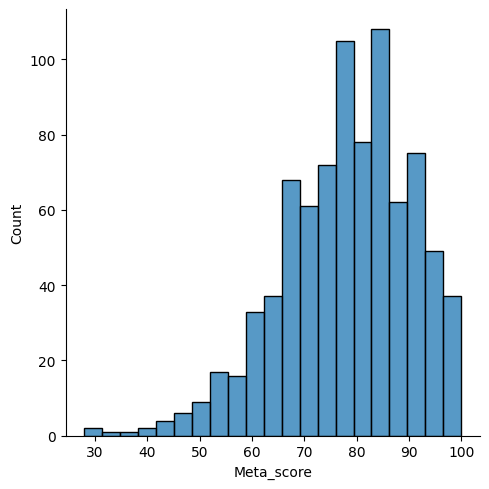

In [7]:
sns.displot(df['Meta_score'])

In [8]:
# fill missings in meta_score using group median values
for t in df['Genre'].unique():
    df.loc[(df['Genre'] == t) & (df['Meta_score'].isna()), 'Meta_score'] = \
    df.loc[(df['Genre'] == t), 'Meta_score'].median()

c:\Users\kyana\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\kyana\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\kyana\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\kyana\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\kyana\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\k

c:\Users\kyana\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


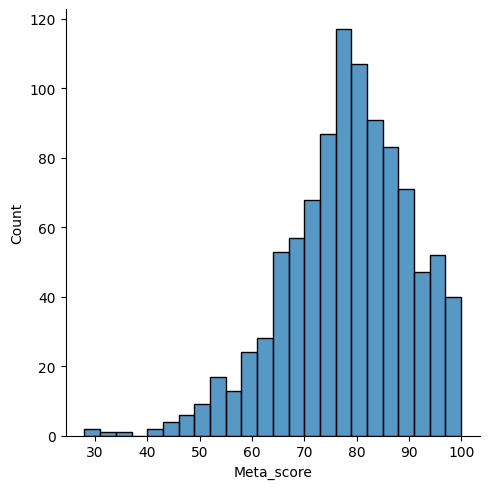

In [9]:
sns.displot(df['Meta_score'])

In [10]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score        20
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [11]:
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].median()) # replace last missing by column median

In [12]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score         0
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

c:\Users\kyana\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


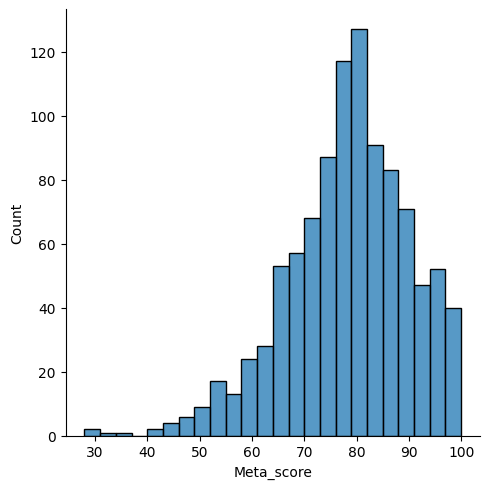

In [13]:
sns.displot(df['Meta_score'])

In [14]:
# working with missings in Gross
# df['Gross'].replace({'nan': 0})

In [15]:
df['Gross'].unique()

array(['28,341,469', '134,966,411', '534,858,444', '57,300,000',
       '4,360,000', '377,845,905', '107,928,762', '96,898,818',
       '292,576,195', '37,030,102', '315,544,750', '330,252,182',
       '6,100,000', '342,551,365', '171,479,930', '46,836,394',
       '290,475,067', '112,000,000', nan, '53,367,844', '188,020,017',
       '7,563,397', '10,055,859', '216,540,909', '136,801,374',
       '57,598,247', '100,125,643', '130,742,922', '322,740,140',
       '269,061', '335,451,311', '13,092,000', '13,182,281', '53,089,891',
       '132,384,315', '32,572,577', '187,705,427', '6,719,864',
       '23,341,568', '19,501,238', '422,783,777', '204,843,350',
       '11,990,401', '210,609,762', '5,321,508', '32,000,000',
       '1,024,560', '163,245', '19,181', '1,661,096', '5,017,246',
       '12,391,761', '190,241,310', '858,373,000', '678,815,482',
       '209,726,015', '162,805,434', '448,139,099', '6,532,908',
       '1,223,869', '223,808,164', '11,286,112', '707,481', '25,544,867',
 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    1000 non-null   object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     1000 non-null   float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [17]:
df['Gross'] = df['Gross'].str.replace(',', '').astype(float).astype('Int64')

In [18]:
df['Gross'].unique()

<IntegerArray>
[ 28341469, 134966411, 534858444,  57300000,   4360000, 377845905, 107928762,
  96898818, 292576195,  37030102,
 ...
  76657000,  43000000,  35000000, 132088635,    959000,    696690,   1378435,
 141843612,  13780024,  30500000]
Length: 824, dtype: Int64

In [19]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score         0
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [20]:
# finally fill missings in Gross using median
df['Gross'] = df['Gross'].fillna(df['Gross'].median())

In [21]:
df.isnull().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    1000 non-null   object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     1000 non-null   float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          1000 non-null   Int64  
dtypes: Int64(1), float64(2), int64(1), object(12)
memory usage: 126.1+ KB


In [23]:
# Creating a line plot with Matplotlib showing trends in IMDB_Rating over the years


In [24]:
df['Released_Year'] = df['Released_Year'].replace({'PG': 1995})

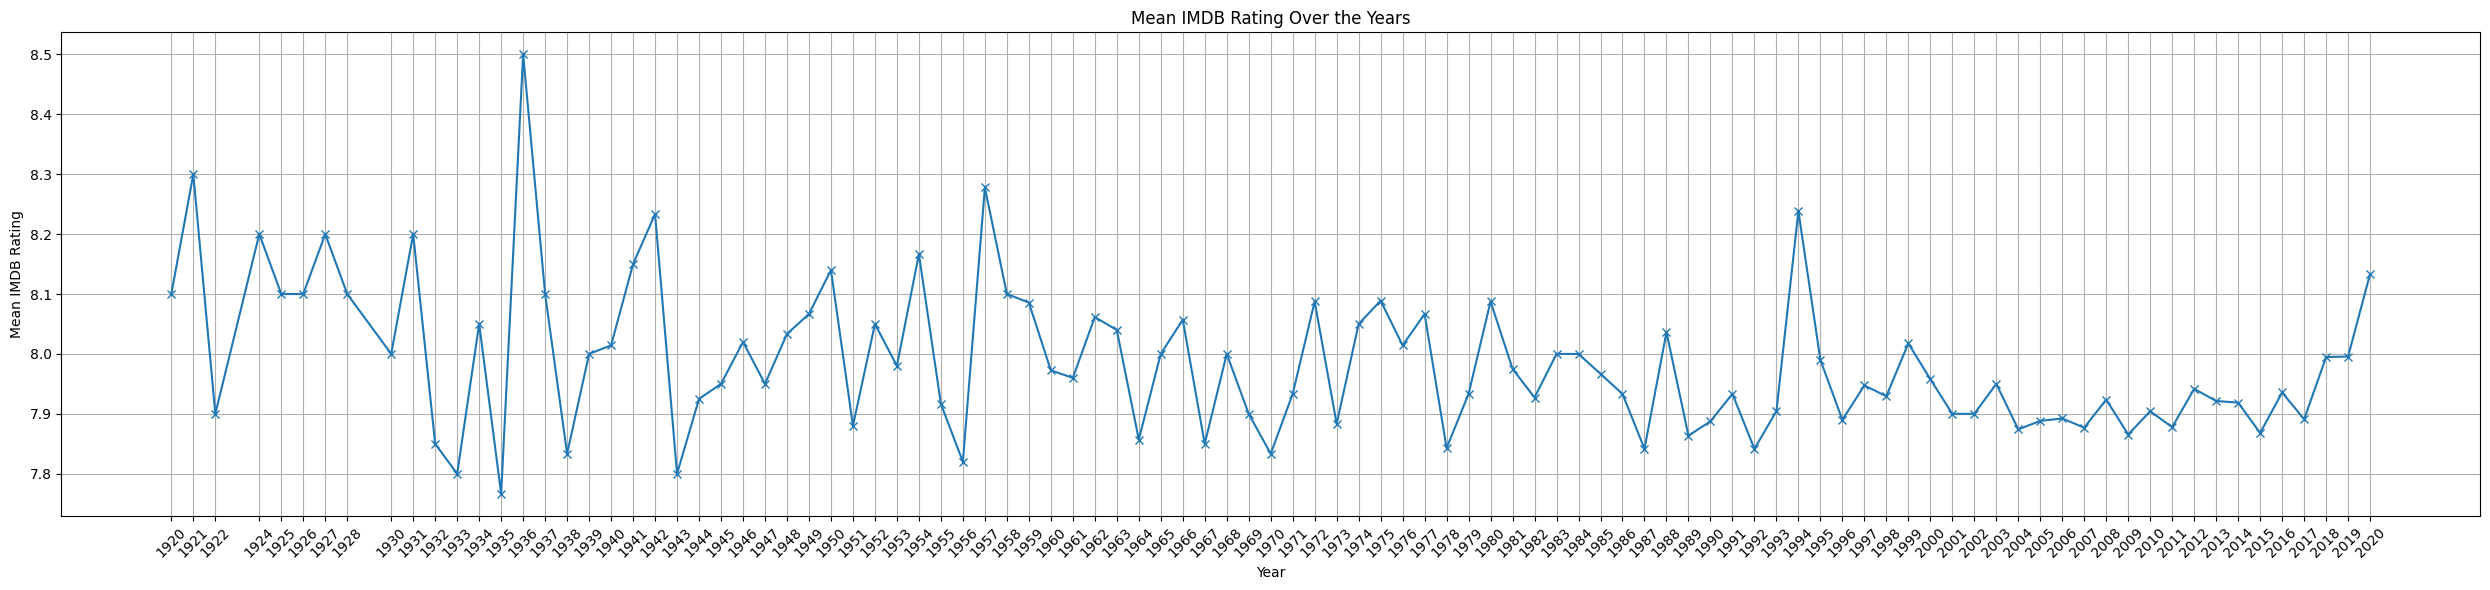

In [25]:
df['Released_Year'] = pd.to_datetime(df['Released_Year'], format='%Y')
mean_ratings = df.groupby(df['Released_Year'].dt.year)['IMDB_Rating'].mean()

plt.figure(figsize=(25, 6))
plt.plot(mean_ratings.index, mean_ratings.values, marker='x', linestyle='-')
plt.title('Mean IMDB Rating Over the Years')
plt.xlabel('Year')
plt.ylabel('Mean IMDB Rating')
plt.grid(True)
plt.xticks(mean_ratings.index, rotation=45)
plt.tight_layout()
plt.show()

In [26]:
df['Genre'].unique()

array(['Drama', 'Crime, Drama', 'Action, Crime, Drama',
       'Action, Adventure, Drama', 'Biography, Drama, History',
       'Action, Adventure, Sci-Fi', 'Drama, Romance', 'Western',
       'Action, Sci-Fi', 'Biography, Crime, Drama',
       'Action, Adventure, Fantasy', 'Comedy, Drama, Thriller',
       'Adventure, Drama, Sci-Fi', 'Animation, Adventure, Family',
       'Drama, War', 'Crime, Drama, Fantasy', 'Comedy, Drama, Romance',
       'Crime, Drama, Mystery', 'Crime, Drama, Thriller',
       'Action, Drama, Mystery', 'Drama, Family, Fantasy', 'Drama, Music',
       'Biography, Comedy, Drama', 'Drama, Mystery, Sci-Fi',
       'Biography, Drama, Music', 'Crime, Mystery, Thriller',
       'Animation, Adventure, Drama', 'Animation, Drama, War',
       'Adventure, Comedy, Sci-Fi', 'Horror, Mystery, Thriller',
       'Drama, Romance, War', 'Comedy, Drama, Family',
       'Animation, Drama, Fantasy', 'Action, Biography, Drama',
       'Animation, Action, Adventure', 'Drama, Western',


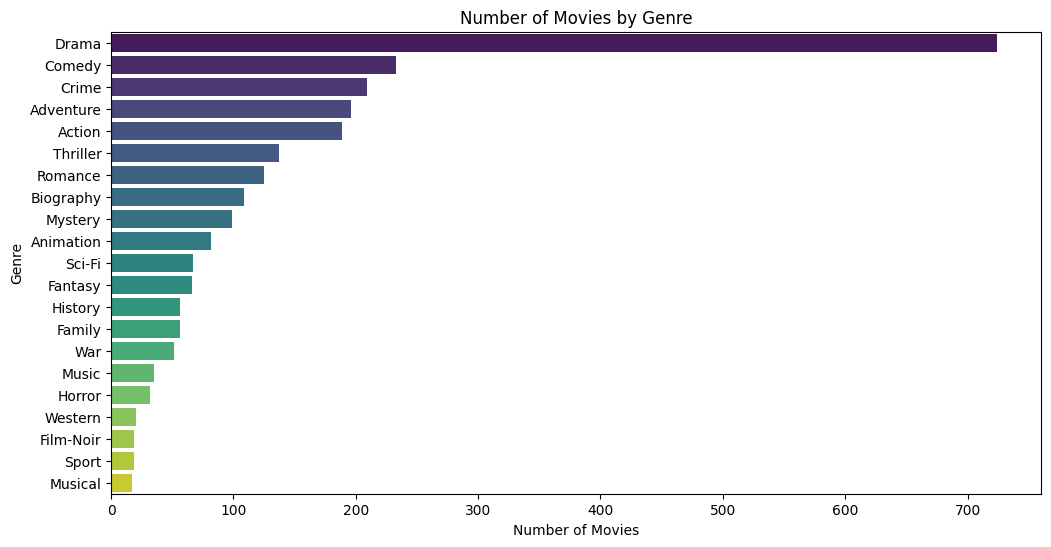

In [27]:
genres = df['Genre'].str.split(', ', expand=True).stack()

# Count the occurrences of each genre
genre_counts = genres.value_counts()

# Plotting the counts using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Number of Movies by Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

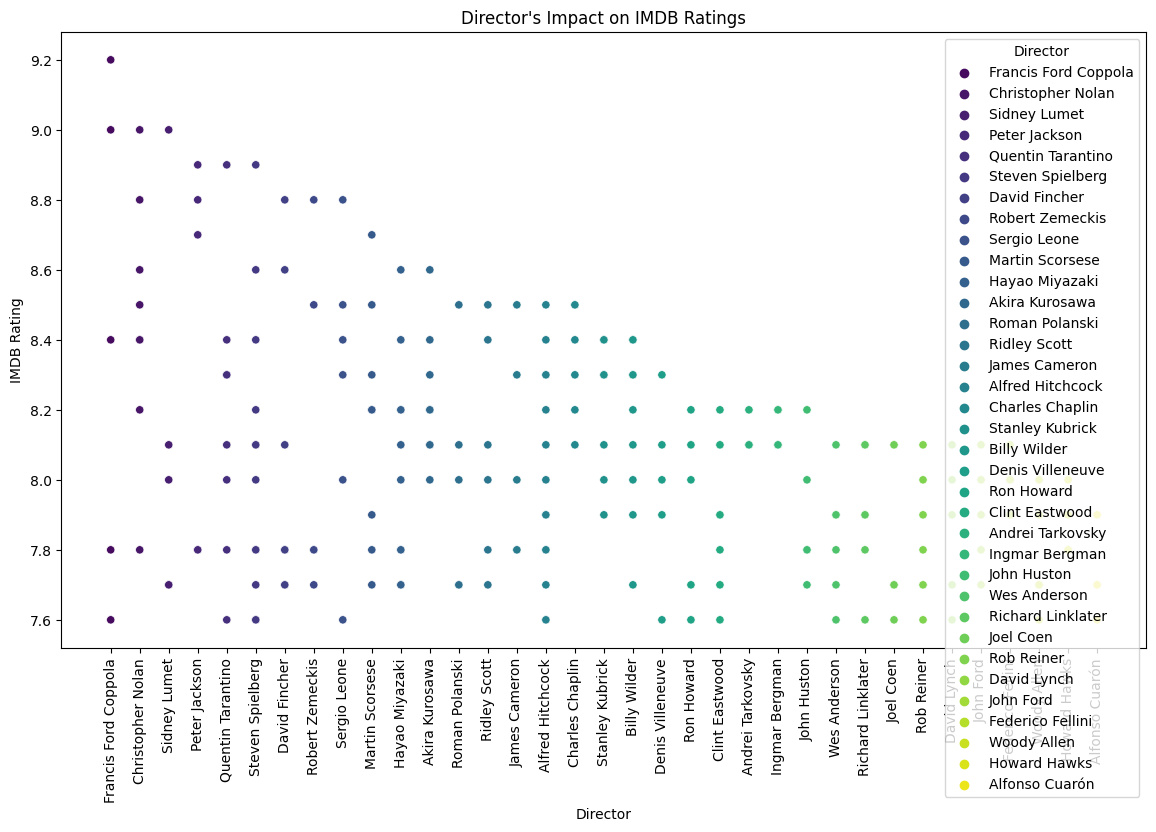

In [28]:
# Director’s Impact on Ratings
director_counts = df['Director'].value_counts()
top_directors = director_counts[director_counts >= 5].index
top_directors_df = df[df['Director'].isin(top_directors)]
plt.figure(figsize=(14, 8))
sns.scatterplot(data=top_directors_df, x='Director', y='IMDB_Rating', hue='Director', palette='viridis')
plt.title("Director's Impact on IMDB Ratings")
plt.xlabel('Director')
plt.ylabel('IMDB Rating')
plt.xticks(rotation=90)
plt.show()

c:\Users\kyana\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kyana\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\kyana\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\kyana\App

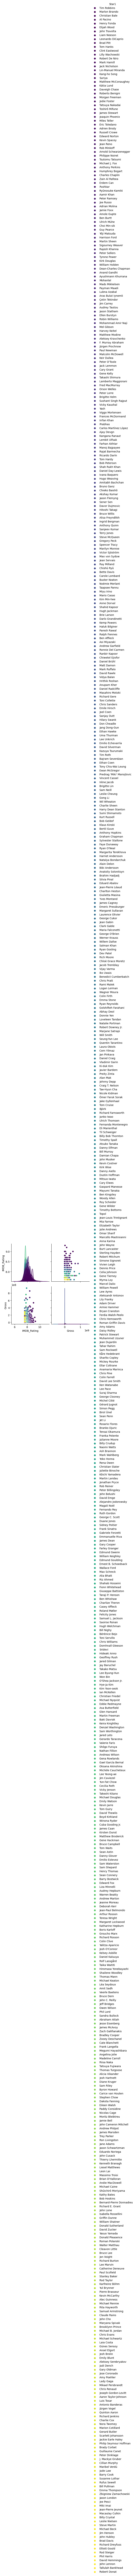

In [29]:
# Star Power Analysis
sns.pairplot(df, vars=['IMDB_Rating', 'Gross'], hue='Star1', palette='viridis')
plt.show()

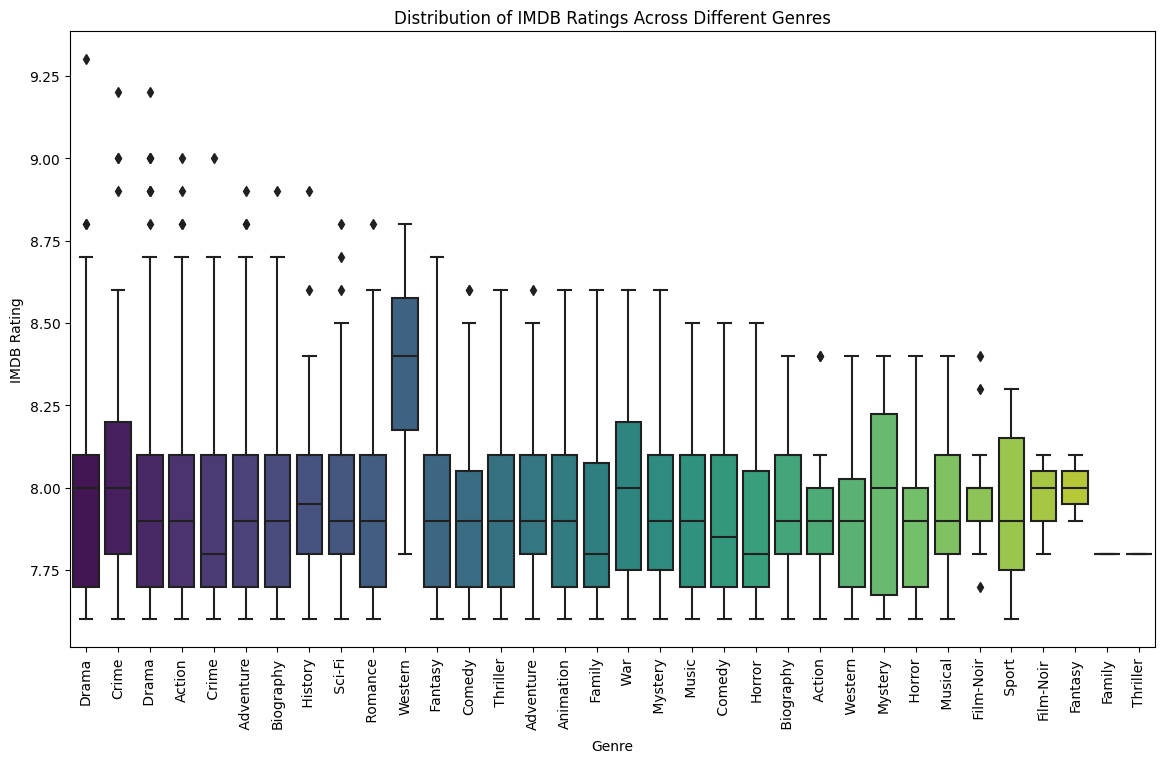

In [30]:
# Box Plot of Genres vs. Ratings
genres_expanded = df[['IMDB_Rating', 'Genre']].copy()
genres_expanded['Genre'] = genres_expanded['Genre'].str.split(',')
genres_expanded = genres_expanded.explode('Genre')
plt.figure(figsize=(14, 8))
sns.boxplot(data=genres_expanded, x='Genre', y='IMDB_Rating', palette='viridis')
plt.title('Distribution of IMDB Ratings Across Different Genres')
plt.xlabel('Genre')
plt.ylabel('IMDB Rating')
plt.xticks(rotation=90)
plt.show()

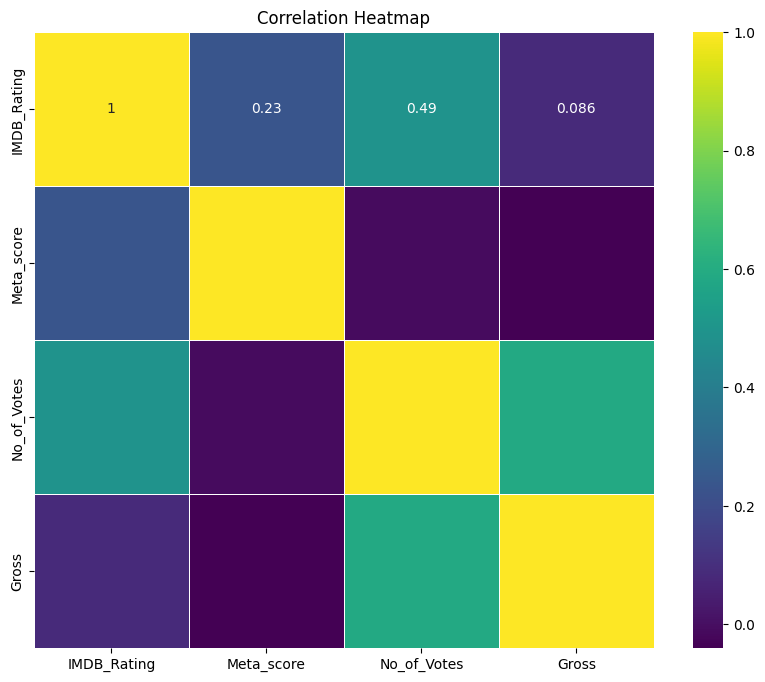

In [31]:
# Correlation Heatmap
numerical_cols = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()